In [11]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as wi
from scipy.integrate import odeint

Ejercicio 1

In [92]:
def polares(R, a, b, c):
    r, theta = R
    return np.array([-a*r, c/(np.log(b*r))])

/tmp/ipykernel_52828/3483982619.py:3: RuntimeWarning: divide by zero encountered in log
  return np.array([-a*r, c/(np.log(b*r))])


Text(0, 0.5, 'Theta')

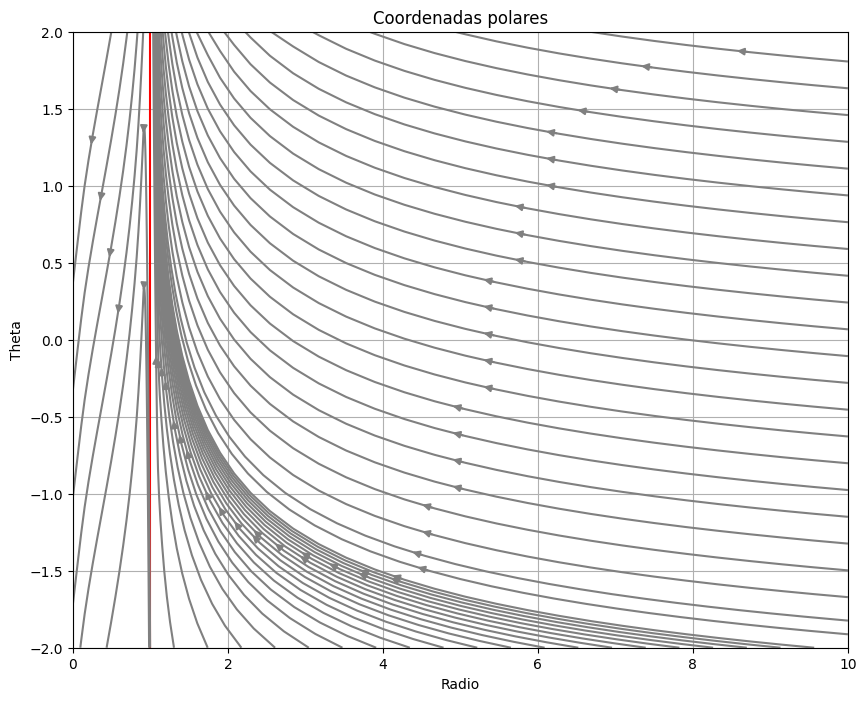

In [205]:
plt.figure(figsize = (10, 8))
Y, X = np.mgrid[-2:2:100j, 0:10:100j]
U, V = polares([X, Y], 1, 1, 1)
plt.axvline(1, color = "red")
plt.grid()
plt.streamplot(X, Y, U, V, density = 0.8, broken_streamlines = False, color = "grey")
plt.title("Coordenadas polares")
plt.xlabel("Radio")
plt.ylabel("Theta")

Se pueden problemas cuando r = 1, los theta tienden a infinito porque log(r) tiende a 0

Es un sistema de ecuaciones no lineales, de primer orden, autonomo y homogeneo.

In [208]:
def cartesianas(X):
    x, y = X
    return np.array([-x, -y])

Text(0, 0.5, 'y')

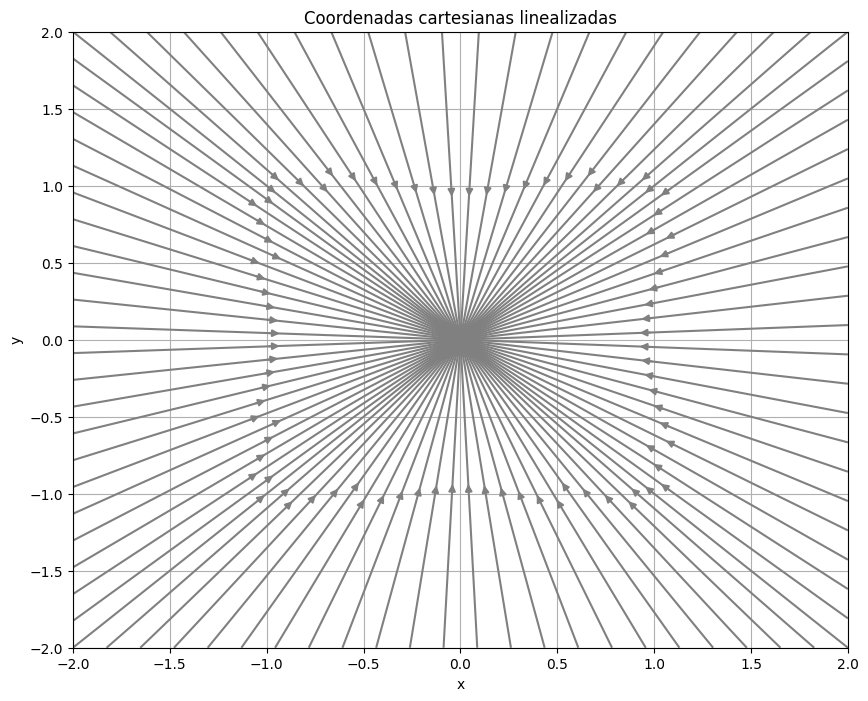

In [210]:
plt.figure(figsize = (10, 8))
Y, X = np.mgrid[-2:2:100j, -2:2:100j]
U, V = cartesianas([X, Y])
plt.grid()
plt.streamplot(X, Y, U, V, density = 0.8, broken_streamlines = False, color = "grey")
plt.title("Coordenadas cartesianas linealizadas")
plt.xlabel("x")
plt.ylabel("y")

In [102]:
def cartesianas_nolineal(X):
    x, y = X
    return np.array([-x-y/np.log(np.sqrt(x**2+y**2)), -y+x/np.log(np.sqrt(x**2+y**2))])

Text(0, 0.5, 'y')

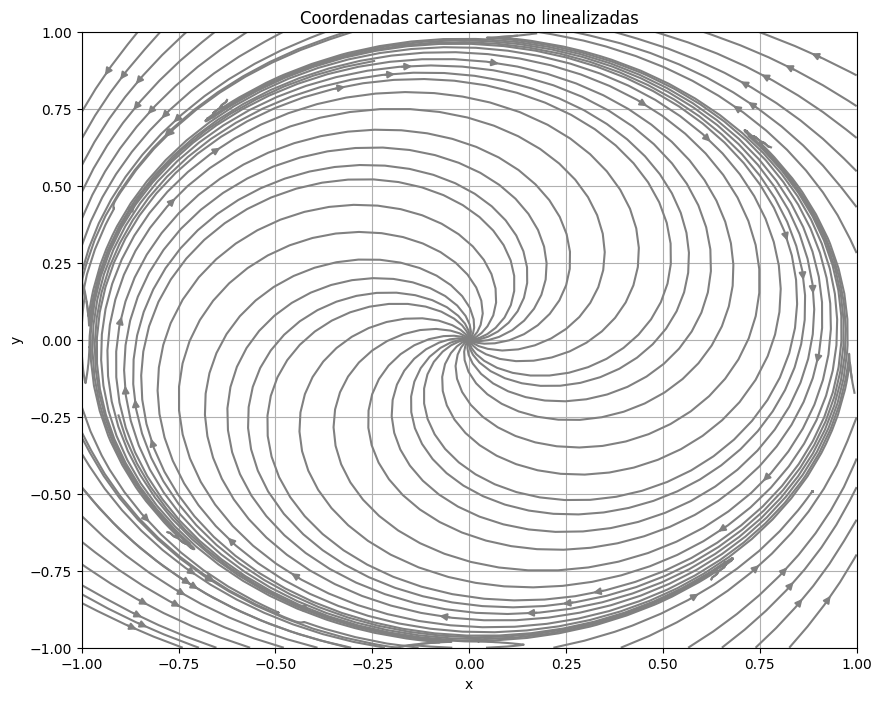

In [211]:
plt.figure(figsize = (10, 8))
Y, X = np.mgrid[-1:1:100j, -1:1:100j]
U, V = cartesianas_nolineal([X, Y])
plt.grid()
plt.streamplot(X, Y, U, V, density = 0.8, broken_streamlines = False, color = "grey")
plt.title("Coordenadas cartesianas no linealizadas")
plt.xlabel("x")
plt.ylabel("y")

Son las espirales que tienen que aparecer por el analisis del punto b

Ejercicio 2

In [ ]:
def Euler(a,b,n,F,y0,p):
    h = (b-a)/n
    t = np.arange(a,b,h)
    y = np.zeros((len(y0), n))
    y[:,0] = y0

    for i in range(n-1):
        y[:,i+1] = y[:,i] + h*(F(t[i], y[:,i], p))
    
    return (t,y)

In [213]:
def ejercicio2(t, M, p):
    beta, gamma = p
    x, y, z = M
    m = x**2 + y**2 + z**2
    return np.array([-gamma*y-beta*x*z/m, gamma*x-beta*y*z/m, beta*(x**2+y**2)/m])

In [218]:
def tray(beta, gamma):

    y0 = np.array([0.7, 0, 0.7])
    t, y = Euler(0, 100, 100000, ejercicio2, y0, [beta, gamma])

    fig = plt.figure(figsize=(12, 9))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlim((-1, 1))
    ax.set_ylim((-1, 1))
    ax.set_zlim((0.4, 1))
    ax.plot(y[0], y[1], y[2], color='blue', alpha=0.7, linewidth=1)

wi.interact(tray, beta = wi.FloatSlider(value = 0.1, min = 0, max = 2, step = 0.01), gamma = wi.FloatSlider(value = 1, min = 0, max = 2, step = 0.01))

interactive(children=(FloatSlider(value=0.1, description='beta', max=2.0, step=0.01), FloatSlider(value=1.0, d…

<function __main__.tray(beta, gamma)>

Trayectorias bajo un campo magnetico H en la direccion z

In [221]:
def flujo(beta, gamma):
    fig = plt.figure(figsize=(12, 9))
    ax = fig.add_subplot(111, projection='3d')

    Z, Y, X = np.meshgrid(np.arange(-1, 1, 0.3),
                          np.arange(-1, 1, 0.3),
                          np.arange(-1, 1, 0.3))
    U, V, W = ejercicio2(0, [X, Y, Z], [beta, gamma])

    ax.quiver(X, Y, Z, U, V, W, length=0.1, normalize=True)

wi.interact(flujo, beta = wi.FloatSlider(value = 0.1, min = 0, max = 2, step = 0.01), gamma = wi.FloatSlider(value = 1, min = 0, max = 2, step = 0.01))

interactive(children=(FloatSlider(value=0.1, description='beta', max=2.0, step=0.01), FloatSlider(value=1.0, d…

<function __main__.flujo(beta, gamma)>

Campo de derivadas del mismo problema

Comentario: Como estoy usando mi propio metodo de Euler puede ser que haya problemas para ciertos betas y gammas, ya que se genera cierta inestabilidad numerica debido al paso que estoy tomando para mi implementacion

La funcion no tiene orbitas periodicas, hay un punto al cual las trayectorias tienden cuando el tiempo se va a infinito. Si bien en el quiver no queda completamente claro, tanto en este ultimo como las trayectorias se ve como agarrando un punto cualquiera siempre llega a algun punto donde muere. 
Ademas parecer que el beta comanda que tan rapido muere la trayectoria, entonces en cuanto mayor es mas rapido avanza el sistema al punto de equilibrio, y el gamma nos dice que tanto "gira" en la trayectoria, entonces en cuento mayor es mas vueltas da la trayectoria.

Ejercicio 3

In [155]:
def ejercicio3(t, Y, p):
    theta, phi = Y
    return np.array([-np.sin(theta), 1+phi-phi])

Text(0.5, 1.0, 'Coordenadas esfericas')

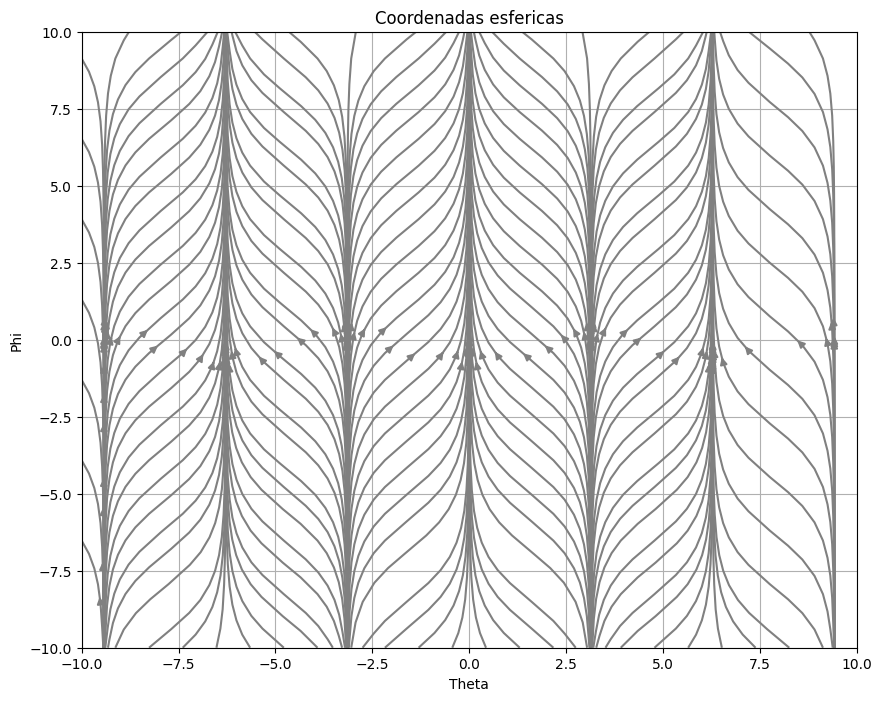

In [223]:
plt.figure(figsize = (10, 8))
Y, X = np.mgrid[-10:10:100j, -10:10:100j]
U, V = ejercicio3(0, [X, Y], [])
plt.grid()
plt.streamplot(X, Y, U, V, density = 0.8, broken_streamlines = False, color = "grey")
plt.xlabel("Theta")
plt.ylabel("Phi")
plt.title("Coordenadas esfericas")

Inciso c

Tomo k = 1 en la solucion de theta en funcion del tiempo. Entonces theta(0) es pi/2

In [ ]:
hi = [10**(-i) for i in range(5)]
y0 = [np.pi/2, 0]
e = []

for h in hi:
    n = int(100/h)
    t, y = Euler(0, 100, n, ejercicio3, y0, []) 
    s = [np.acos((np.exp(2*i)-1)/(np.exp(2*i)+1)) for i in t]
    error = np.linalg.norm(y[0]-s)
    e.append(error)

Text(0.5, 1.0, 'Error contra h en escala logaritmica')

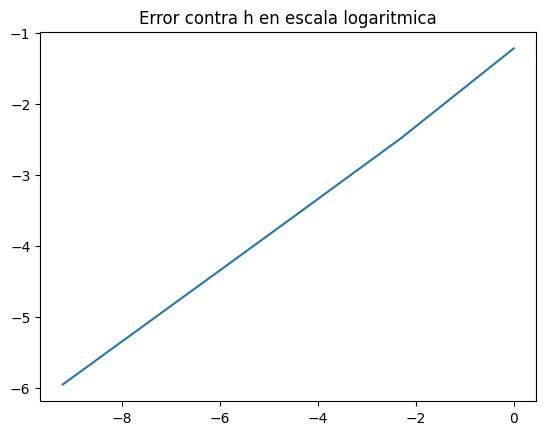

In [199]:
plt.plot(np.log(hi), np.log(e))
plt.title("Error contra h en escala logaritmica")

El error aumenta a medida que h aumenta de manera lineal cuando vemos el logaritmo de cada uno.